# Graded Challenge 4

# Introduction
## Author
Delfi Kusuma Wardhani 

H8 FTDS/002

    
## Objectives
Mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran dengan menggunakan 2 metode clustering, yaitu K-Means Algorithm dan Gaussian Mixtures. Dari 2 model ini akan dipilih satu yang paling merepresentasikan  karakteristik tertentu dari setiap klasternya.

## Dataset Description
sampel dataset di bawah ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. Dataset berisi 18 variabel perilaku customer/pelanggan.

- CUSTID : Identitas Pemegang Kartu Kredit (Categorical)
- BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian 
- BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PURCHASES : Jumlah pembelian yang dilakukan dari akun
- ONEOFF_PURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan secara mencicil
- CASH_ADVANCE : Uang tunai di muka yang diberikan oleh user
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- ONEOFF_PURCHASES_FREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- PURCHASES_INSTALLMENTS_FREQUENCY : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
- CASH_ADVANCE_FREQUENCY : Seberapa sering uang tunai di muka dibayarkan
- CASH_ADVANCE_TRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT : Batas Kartu Kredit untuk user
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh user
- MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh user
- PRC_FULL_PAYMENT : Persentase pembayaran penuh yang dibayarkan oleh user
- TENURE : angka waktu layanan kartu kredit untuk user


# Import Library

In [2]:
# Common import
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Model
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [3]:
data = pd.read_csv('CC GENERAL.csv')
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Cleaning and Preprocessing (for EDA)

Merubah nama kolom agar lebih mudah dalam penulisan

In [4]:
df.rename(columns={ 'CUST_ID':'id',
            'BALANCE' : 'balance',
            'BALANCE_FREQUENCY' : 'balance_freq',
            'PURCHASES' : 'purchases',
            'ONEOFF_PURCHASES' : 'oneoff_pur',
            'INSTALLMENTS_PURCHASES' : 'installment_pur',
            'CASH_ADVANCE' : 'cash_adv',
            'PURCHASES_FREQUENCY' : 'pur_freq',
            'ONEOFF_PURCHASES_FREQUENCY' : 'oneoff_pur_freq',
            'PURCHASES_INSTALLMENTS_FREQUENCY' : 'pur_ins_freq',
            'CASH_ADVANCE_FREQUENCY' : 'cash_adv_freq',
            'CASH_ADVANCE_TRX' : 'cash_adv_trx',
            'PURCHASES_TRX' : 'pur_trx',
            'CREDIT_LIMIT' : 'credit_limit',
            'PAYMENTS' : 'payments',
            'MINIMUM_PAYMENTS' : 'min_payment',
            'PRC_FULL_PAYMENT' : 'prc_full_payment',
            'TENURE' : 'tenure'}, inplace=True)
df.head()

,id,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Menampilkan dimensi & info (kolom, tipe data, keterisian data) dari dataset

In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8950 non-null   object 
 1   balance           8950 non-null   float64
 2   balance_freq      8950 non-null   float64
 3   purchases         8950 non-null   float64
 4   oneoff_pur        8950 non-null   float64
 5   installment_pur   8950 non-null   float64
 6   cash_adv          8950 non-null   float64
 7   pur_freq          8950 non-null   float64
 8   oneoff_pur_freq   8950 non-null   float64
 9   pur_ins_freq      8950 non-null   float64
 10  cash_adv_freq     8950 non-null   float64
 11  cash_adv_trx      8950 non-null   int64  
 12  pur_trx           8950 non-null   int64  
 13  credit_limit      8949 non-null   float64
 14  payments          8950 non-null   float64
 15  min_payment       8637 non-null   float64
 16  prc_full_payment  8950 non-null   float64


Menjadikan kolom id sebagai kolom index agar tidak ada kolom berisi object pada dataset.

In [7]:
df = df.set_index('id')
df

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
id,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


Mengecek adanya missing value dan duplikasi data

In [8]:
print('Jumlah missing value : ', df.isnull().sum())
print('Jumlah duplikasi data : ', df.duplicated().sum())

Jumlah missing value :  balance               0
balance_freq          0
purchases             0
oneoff_pur            0
installment_pur       0
cash_adv              0
pur_freq              0
oneoff_pur_freq       0
pur_ins_freq          0
cash_adv_freq         0
cash_adv_trx          0
pur_trx               0
credit_limit          1
payments              0
min_payment         313
prc_full_payment      0
tenure                0
dtype: int64
Jumlah duplikasi data :  0


Terdapat 313 missing value pada kolom 'min_payment' dan 1 missing value pada kolom 'credit_limit'. Selanjutnya akan kita lihat unique value untuk kedua kolom ini

In [9]:
df.credit_limit.unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [10]:
df.min_payment.unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [11]:
df[df.isnull().any(axis=1)]

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
id,,,,,,,,,,,,,,,,,
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6


Untuk kolom 'min'payment', nilai missing value akan diisi dengan nilai median nya.

Sedangkan untuk kolom 'credit_limit' akan dihapus seluruh row yang berisikan missing value.

In [12]:
# Mengisi missing value pada kolom min_payment dengan nilai median
df['min_payment'].fillna(df['min_payment'].median(), inplace=True)

# Menghilangkan baris data yang terdapat missing value di kolom credit_limit
df.dropna(subset=['credit_limit'], inplace=True)

In [13]:
# Mengecek kembali adanya missing value
df[df.isnull().any(axis=1)]

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
id,,,,,,,,,,,,,,,,,


In [14]:
# Deskripsi keseluruhan dataset
df.describe()

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Terdapat anomali pada dataset, di mana nilai maksimum dari cash_adv_freq adalah 1.5 , sedangkan untuk semua nilai frekuensi seharusnya maksimumnya adalah 1.0

In [15]:
outlier = df[df['cash_adv_freq'] > 1.0].index
outlier

Index(['C10708', 'C11680', 'C12629', 'C12684', 'C13127', 'C13347', 'C18273',
       'C18588'],
      dtype='object', name='id')

Terdapat 8 baris dimana nilai pada kolom fitur 'cash_adv_freq lebih dari 1.0. Selanjutnya 8 baris ini dianggap sebagai outlier dan akan dihapus dari dataset

In [16]:
df.drop(outlier, inplace = True)
df.shape

(8941, 17)

In [17]:
df.describe()

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,prc_full_payment,tenure
count,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000,8941.000000
mean,1561.845414,0.877259,1004.083438,592.902497,411.481425,976.518276,0.490713,0.202530,0.364804,0.134194,3.235209,14.722962,4492.308258,1733.677679,844.861301,0.153869,11.521306
std,2079.718985,0.236879,2137.526323,1660.653167,904.699100,2095.839076,0.401385,0.298444,0.397479,0.197669,6.809507,24.866639,3638.446283,2896.003290,2333.891473,0.292606,1.331900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.175207,0.888889,39.830000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.273938,170.786793,0.000000,12.000000
50%,871.499977,1.000000,362.480000,38.000000,89.580000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.533676,312.343947,0.000000,12.000000
75%,2046.727519,1.000000,1111.120000,578.660000,469.140000,1112.247446,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1903.279643,787.853297,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Sudah tidak ada anomali pada dataset, data siap untuk dieksplorasi.

# Exploratory Data Analysis (EDA)
Dari kumpulan data ini kita akan mengekstrak segmen pelanggan tergantung pada pola perilaku mereka yang disediakan dalam kumpulan data, untuk memfokuskan strategi pemasaran perusahaan pada segmen tertentu. Gambar di bawah berikut ini adalah grafik persebaran data untuk tiap kolomnya.

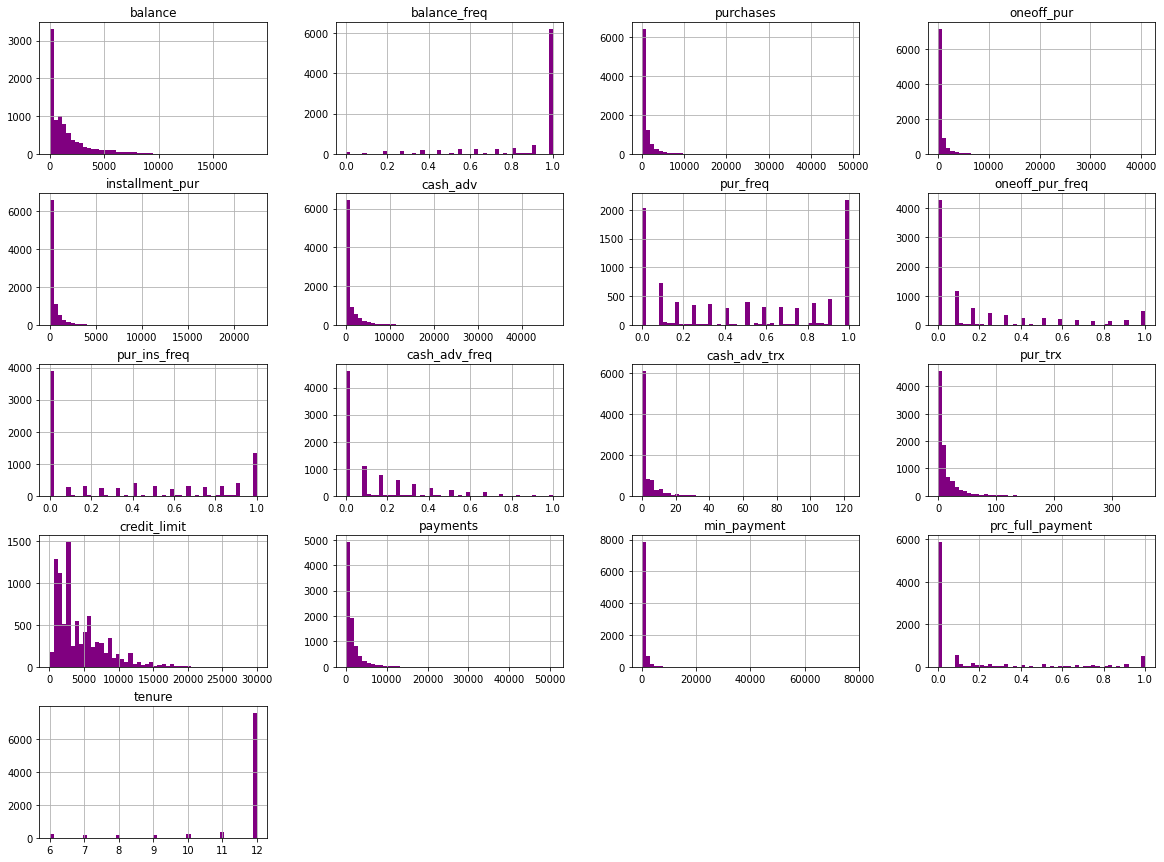

In [18]:
df.hist(bins=50, figsize=(20,15), color='purple')
plt.show()

Hampir seluruh data cenderung _skewed_ ke kanan, sehingga kemungkinan terdapat banyaknya outlier dengan nilai yang tinggi jauh melebihi nilai tengah(median) dan nilai rata-ratanya. Selanjutnya akan kita analisis lagi lebih dalam untuk tiap fitur dalam daset.

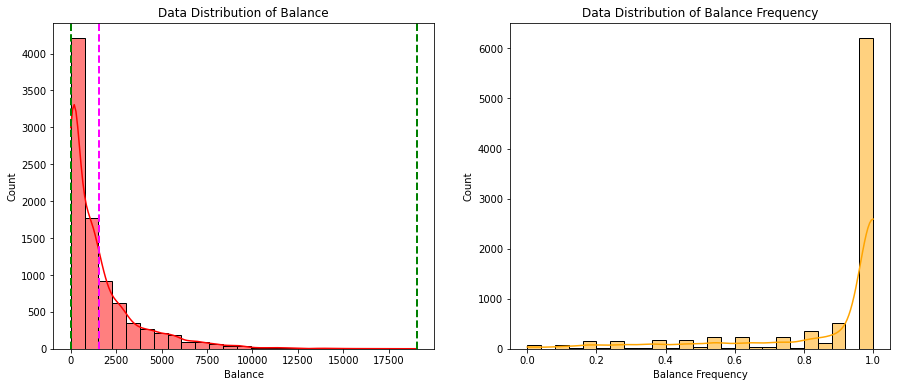

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='balance', kde=True, bins=25, color='red')
plt.axvline(df['balance'].min(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['balance'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['balance'].max(), color='green', linestyle='dashed', linewidth=2)
plt.title('Data Distribution of Balance')
plt.xlabel('Balance')

plt.subplot(1,2,2)
sns.histplot(data=df, x='balance_freq', kde=True, bins=25, color='orange')
plt.title('Data Distribution of Balance Frequency')
plt.xlabel('Balance Frequency')
plt.show()

- Pada persebaran data balance terdapat kepadatan(_density_) di angka 0-1000, hal ini menandakan bahwa pada umumnya (lebih dari 4000 pengguna kartu kredit) memiliki balance kartu kredit dibawah 1,000 USD. Tetapi terdapat juga user yang balance kartu kreditnya mencapai 10,000 USD - 17,500 USD
- Namun, untuk frekuensi perubahan dari balance itu sendiri banyak yang berada di angka 1, menandakan balance dari (hampir seluruh) pengguna kartu kredit sering berubah-ubah.
- Dapat kita asumsikan bahwa pada umumnya pengguna kartu kredit (_user_) tidak membiarkan ada saldo di dalam kartu kreditnya, meskipun mereka sering menggunakan kartu kredit tersebut untuk transaksi pembayaran. Atau dengan kata lain, user hanya membayar kartu kredit sejumlah tagihannya (tidak melebihi jumlah tagihan)

Selanjutnya mari kita lihat dari segi transaksi pembelian (_purchases_)

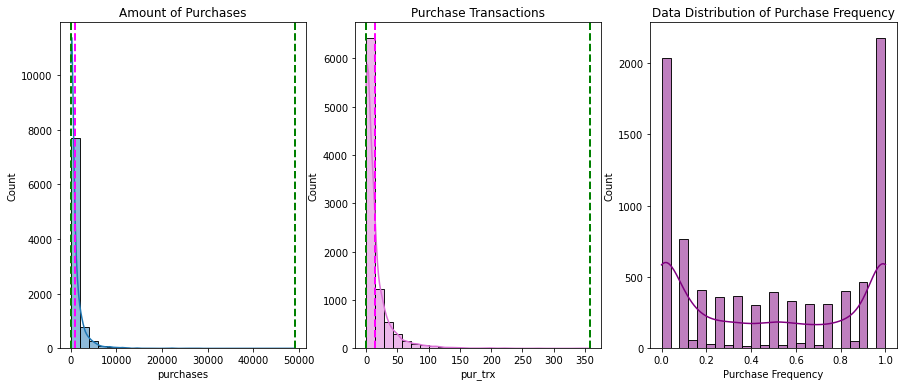

In [20]:
# Menampilkan visualisasi distribusi data Purchases
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.histplot(data=df, x='purchases', kde=True, bins=25)
plt.axvline(df['purchases'].min(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['purchases'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['purchases'].max(), color='green', linestyle='dashed', linewidth=2)
plt.title('Amount of Purchases')

plt.subplot(1,3,2)
sns.histplot(data=df, x='pur_trx', kde=True, bins=25, color='orchid')
plt.axvline(df['pur_trx'].min(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['pur_trx'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pur_trx'].max(), color='green', linestyle='dashed', linewidth=2)
plt.title('Purchase Transactions')

plt.subplot(1,3,3)
sns.histplot(data=df, x='pur_freq', kde=True, bins=25, color='purple')
plt.title('Data Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.show()

In [21]:
print('Rata-rata harga pembelian dalam transaksi kartu kredit : ', "%.2f"%df['purchases'].mean(),'USD')
print('Harga pembelian tertinggi dalam transaksi kartu kredit : ', df['purchases'].max(),'USD')

Rata-rata harga pembelian dalam transaksi kartu kredit :  1004.08 USD
Harga pembelian tertinggi dalam transaksi kartu kredit :  49039.57 USD


- Dilihat dari distribusi frekuensi pembelian, ternyata jumlah user yang jarang berbelanja menggunakan kartu kredit hampir sama banyaknya dengan user yang sering berbelanja menggunakan kartu kredit
- Rata-rata user berbelanja sampai 1,000 USD, namun ada juga user yang berbelanja dengan kartu kredit hingga 49,000 USD 

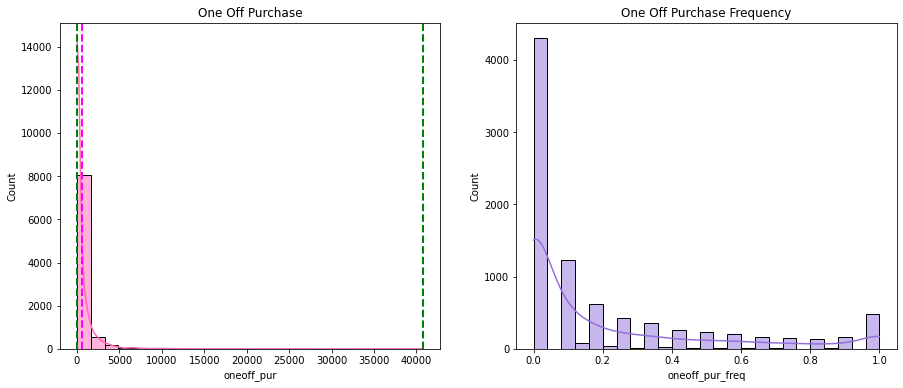

In [22]:
# Menampilkan visualisasi distribusi data One Off Purchase
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='oneoff_pur', kde=True, bins=25, color='hotpink')
plt.axvline(df['oneoff_pur'].min(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['oneoff_pur'].mean(), color='magenta', linestyle='dashed', linewidth=2) 
plt.axvline(df['oneoff_pur'].max(), color='green', linestyle='dashed', linewidth=2)
plt.title('One Off Purchase')

plt.subplot(1,2,2)
sns.histplot(data=df, x='oneoff_pur_freq', kde=True, bins=25, color='mediumpurple')
plt.title('One Off Purchase Frequency')
plt.show()

In [23]:
df['oneoff_pur'].max()

40761.25

In [24]:
df['oneoff_pur'].mean()

592.9024974835042

- Lebih dari 4000 user **tidak** melakukan pembayaran sekaligus dalam sekali jalan (bukan cicilan)
- Nilai pembelian tertinggi (termahal) dalam pembayaran sekaligus yaitu pada harga 40,761.25 USD, 
- Sedangkan rata-rata pembelian dengan pembayaran sekaligus ada pada harga 592 USD 

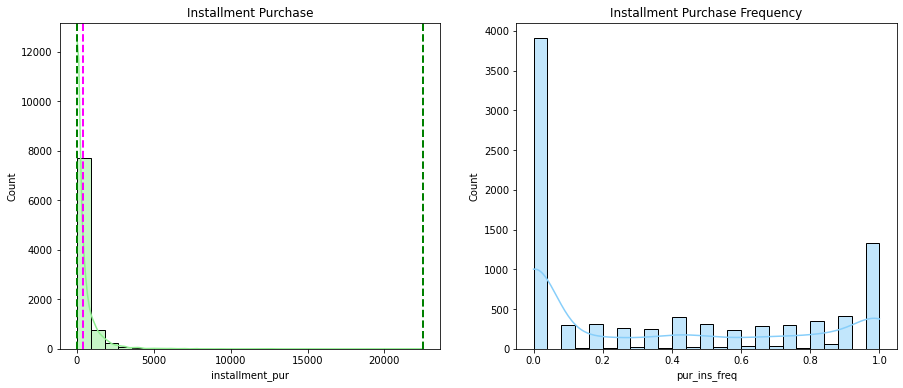

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='installment_pur', kde=True, bins=25, color='lightgreen')
plt.axvline(df['installment_pur'].min(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['installment_pur'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['installment_pur'].max(), color='green', linestyle='dashed', linewidth=2)
plt.title('Installment Purchase')

plt.subplot(1,2,2)
sns.histplot(data=df, x='pur_ins_freq', kde=True, bins=25, color='lightskyblue')
plt.title('Installment Purchase Frequency')
plt.show()

In [26]:
df['installment_pur'].mean()

411.4814248965437

In [27]:
df['installment_pur'].max()

22500.0

- Jumlah user yang sering berbelanja dengan cicilan ternyata lebih banyak dibandingkan dengan jumlah user yang sering berbelanja tanpa cicilan (bayar sekaligus)
- Rata-rata user berbelanja dengan cicilan di harga 411 USD, sedangkan nilai belanja paling tinggi nya mencapai 22,500 USD

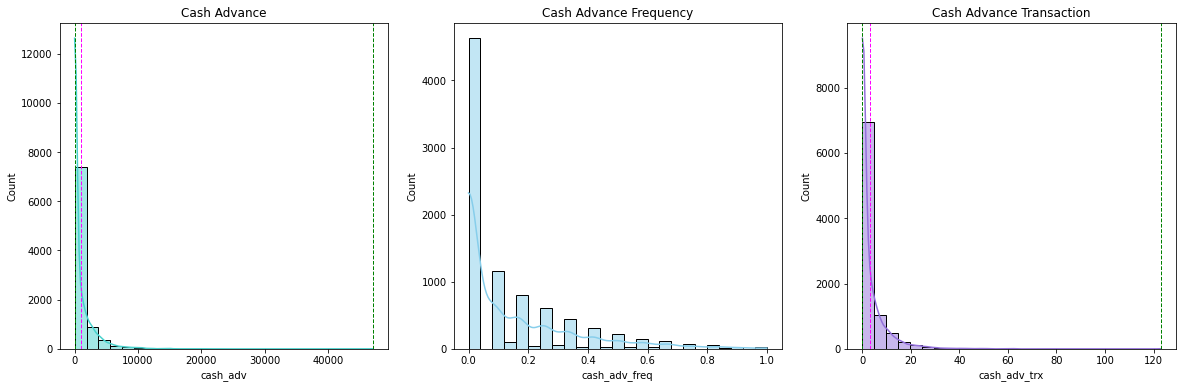

In [28]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(data=df, x='cash_adv', kde=True, bins=25, color='mediumturquoise')
plt.axvline(df['cash_adv'].min(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['cash_adv'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['cash_adv'].max(), color='green', linestyle='dashed', linewidth=1)
plt.title('Cash Advance')

plt.subplot(1,3,2)
sns.histplot(data=df, x='cash_adv_freq', kde=True, bins=25, color='skyblue')
plt.title('Cash Advance Frequency')

plt.subplot(1,3,3)
sns.histplot(data=df, x='cash_adv_trx', kde=True, bins=25, color='mediumpurple')
plt.axvline(df['cash_adv_trx'].min(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['cash_adv_trx'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['cash_adv_trx'].max(), color='green', linestyle='dashed', linewidth=1)
plt.title('Cash Advance Transaction')
plt.show()

In [29]:
print('Rata-rata pinjaman tunai dari user : ', "%.2f"%df['cash_adv'].mean(),'USD')
print('Nilai pinjaman tunai tertinggi dalam transaksi : ', "%.2f"%df['cash_adv'].max(),'USD')

Rata-rata pinjaman tunai dari user :  976.52 USD
Nilai pinjaman tunai tertinggi dalam transaksi :  47137.21 USD


In [30]:
print('Rata-rata jumlah penarikan tunai tiap user : ', "%.0f"%df['cash_adv_trx'].mean(),'transaksi')
print('jumlah tarikan tunai terbanyak oleh user : ', "%.0f"%df['cash_adv_trx'].max(),'transaksi')

Rata-rata jumlah penarikan tunai tiap user :  3 transaksi
jumlah tarikan tunai terbanyak oleh user :  123 transaksi


Cash Advance adalah pinjaman uang tunai jangka pendek yang ditawarkan oleh bank penerbit kartu kredit. Berbeda dengan kartu debit, cash advance menggunakan uang tunai hasil penarikan dari kartu kredit yang sebenarnya bukan uang milik nasabah.

- Lebih dari 4000 user jarang menggunakan kartu kredit untuk pinjaman tunai jangka pendek (tarik tunai saat berbelanja menggunakan kartu kredit)
- Namun terdapat sebagian kecil dari user yang sering menggunakan kartu kredit untuk transaksi cash advance (dari 40 hingga 120 transaksi per user nya)


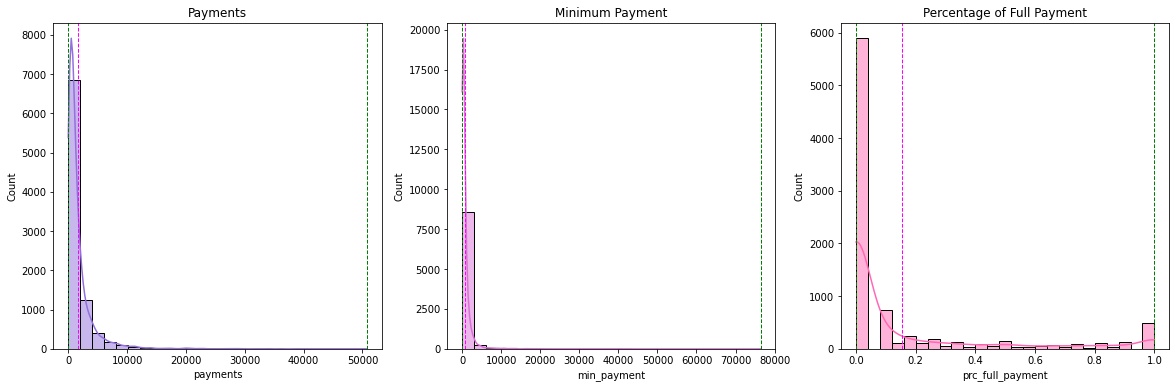

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(data=df, x='payments', kde=True, bins=25, color='mediumpurple')
plt.axvline(df['payments'].min(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['payments'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['payments'].max(), color='green', linestyle='dashed', linewidth=1)
plt.title('Payments')

plt.subplot(1,3,2)
sns.histplot(data=df, x='min_payment', kde=True, bins=25, color='orchid')
plt.axvline(df['min_payment'].min(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['min_payment'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['min_payment'].max(), color='green', linestyle='dashed', linewidth=1)
plt.title('Minimum Payment')

plt.subplot(1,3,3)
sns.histplot(data=df, x='prc_full_payment', kde=True, bins=25, color='hotpink')
plt.axvline(df['prc_full_payment'].min(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['prc_full_payment'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['prc_full_payment'].max(), color='green', linestyle='dashed', linewidth=1)
plt.title('Percentage of Full Payment')
plt.show()

Kalau kita lihat dari grafik di atas, khususnya Percentage of Full Payment, terlihat banyak sekali user yang tidak melakukan payment (dibawah 20%). Selanjutnya mari kita lihat detail pada datasetnya.

In [32]:
df3 = df[['purchases','payments', 'min_payment', 'prc_full_payment']]
df3.head(20)

,purchases,payments,min_payment,prc_full_payment
id,,,,
C10001,95.40,201.802084,139.509787,0.000000
C10002,0.00,4103.032597,1072.340217,0.222222
C10003,773.17,622.066742,627.284787,0.000000
C10004,1499.00,0.000000,312.343947,0.000000
C10005,16.00,678.334763,244.791237,0.000000
C10006,1333.28,1400.057770,2407.246035,0.000000
C10007,7091.01,6354.314328,198.065894,1.000000
C10008,436.20,679.065082,532.033990,0.000000
C10009,861.49,688.278568,311.963409,0.000000


Terdapat kejanggalan pada kolom prc_full_payment (persentase pembayaran penuh yang dibayarkan oleh user). Untuk 20 data pertama seperti yang kita lihat di atas, user yang telah melakukan pembayaran (payment) akan tetapi persentase nya 0. Selanjutnya kolom prc_full_payment akan dihapus karena dikhawatirkan akan berdampak tidak baik untuk training pemodelan nantinya.

In [33]:
df.drop(['prc_full_payment'], axis=1, inplace=True)

In [34]:
df['payments'].mode()

0    0.0
dtype: float64

Disini timbul pertanyaan mengapa banyak user yang payment nya 0 (tidak melakukan pembayaran kartu kredit). Diasumsikan bahwa mereka memiliki nilai balance yang tinggi sehingga tidak diperlukan payment lagi (pembayaran tagihan terpotong dari balance)

In [35]:
df[df['payments']==0]

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,tenure
id,,,,,,,,,,,,,,,,
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,312.343947,12
C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,312.343947,12
C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,312.343947,12
C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.0,312.343947,12
C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.0,312.343947,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19095,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.0,312.343947,8
C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.0,312.343947,6
C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.0,312.343947,6


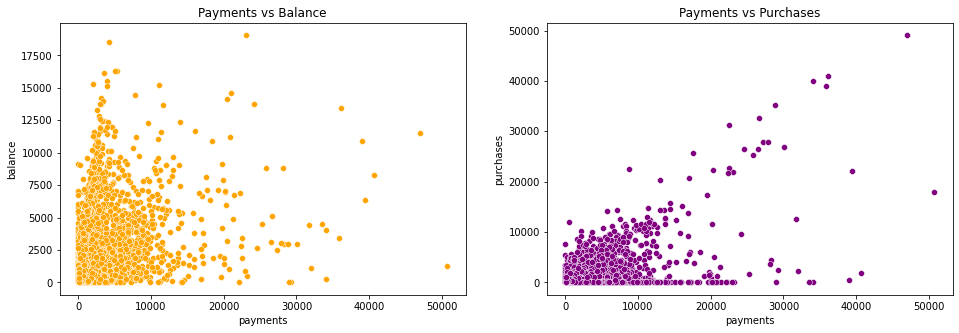

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='payments', y='balance', color='orange')
plt.title('Payments vs Balance')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='payments', y='purchases', color='purple')
plt.title('Payments vs Purchases')
plt.show()

- Pada umumnya, untuk user yang belanjanya dengan nominal besar, nominal paymentnya juga tinggi (hal ini dapat dimengerti, menandakan user membayar tagihannya).
- Namun ada juga user yang melakukan purchase mencapai 20,000 USD dan hanya membayar 10,000 USD (diasumsikan user menggunakan metode cicilan)

Selanjutnya disini ingin dilihat perilaku user berdasarkan limit kartu kreditnya. Diasumsikan bahwa user memiliki karakteristik penggunaan kartu kredit yang berbeda untuk tiap limit kartu kreditnya. Kemudian akan dikelompokkan terlebih dahulu untuk limit kartu kreditnya.

In [37]:
df['credit_limit'].describe()

count     8941.000000
mean      4492.308258
std       3638.446283
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: credit_limit, dtype: float64

In [38]:
labels = ['<5,000 $','5,000-10,000 $','10,000-15,000 $','>15,000 $']
bins = [49.0, 5000.0, 10000.0, 15000.0, 40000.0]
df['limit'] = pd.cut(df["credit_limit"], bins=bins, labels=labels)

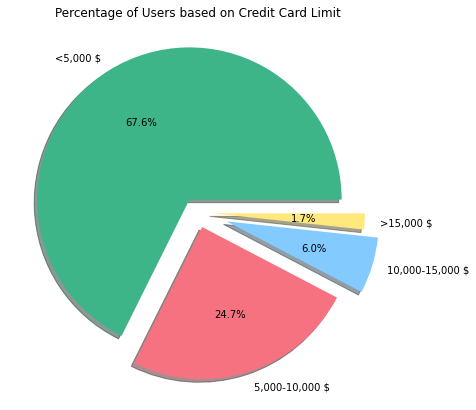

In [39]:
colors = ["#3EB489", "#F67280", "#82CAFF", "#FFE87C"]
explode=[0.1,0.1,0.2,0.1]

plt.figure(figsize=(10,7))
plt.title('Percentage of Users based on Credit Card Limit')
plt.pie(df['limit'].value_counts(), autopct="%.1f%%", colors=colors, explode=explode, shadow=True, labels=labels)
plt.show()

Pada dataset ini umumnya user memiliki kartu kredit dengan limit di bawah 5,000USD. Hanya 17% yang memiliki kartu kredit dengan limit sangat tinggi (> 15,000 USD).

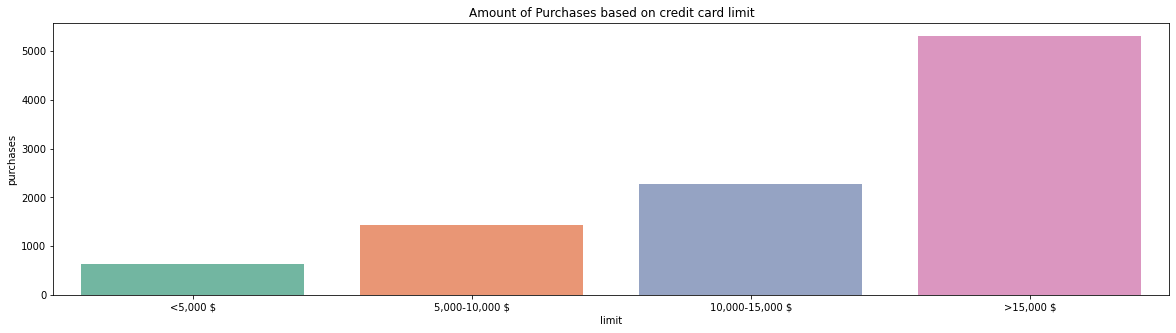

In [40]:
df_lim = df.groupby('limit')[['purchases']].mean().reset_index()
plt.figure(figsize=(20,5))
plt.title("Amount of Purchases based on credit card limit")
sns.barplot(data=df_lim, x='limit', y='purchases', palette='Set2')
plt.show()

Walaupun dengan limit kartu kredit yang tinggi, namun rata-rata nominal pembelanjaannya masih di bawah 6,000 USD

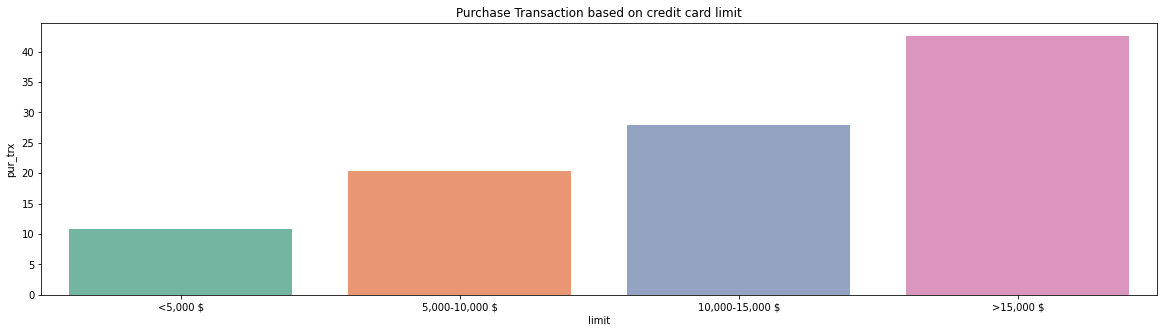

In [41]:
df_lim2 = df.groupby('limit')[['pur_trx']].mean().reset_index()
plt.figure(figsize=(20,5))
plt.title("Purchase Transaction based on credit card limit")
sns.barplot(data=df_lim2, x='limit', y='pur_trx', palette='Set2')
plt.show()

User yang limit kartu kredit nya tinggi rata-rata cenderung lebih banyak bertransaksi pembelian.

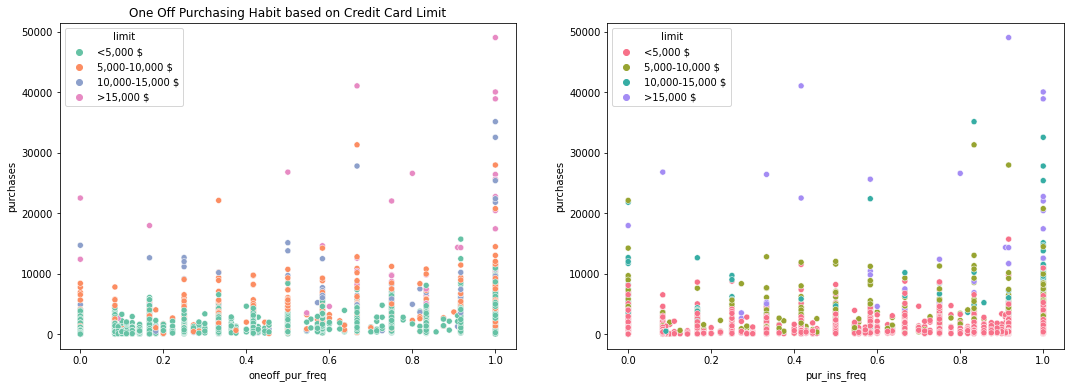

In [42]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title('One Off Purchasing Habit based on Credit Card Limit')
sns.scatterplot(data=df, x='oneoff_pur_freq', y='purchases', hue='limit', palette='Set2')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='pur_ins_freq', y='purchases', hue='limit', palette='husl')
plt.title('')
plt.show()

Ternyata untuk frekuensi berbelanja dari user dengan limit kartu kredit tertentu dan yang lainnya sama tersebarnya. Yang membedakannya adalah nominal dari pembeliannya.

Kini mari kita lihat korelasi / keterhubungan antar feature dalam dataset. 

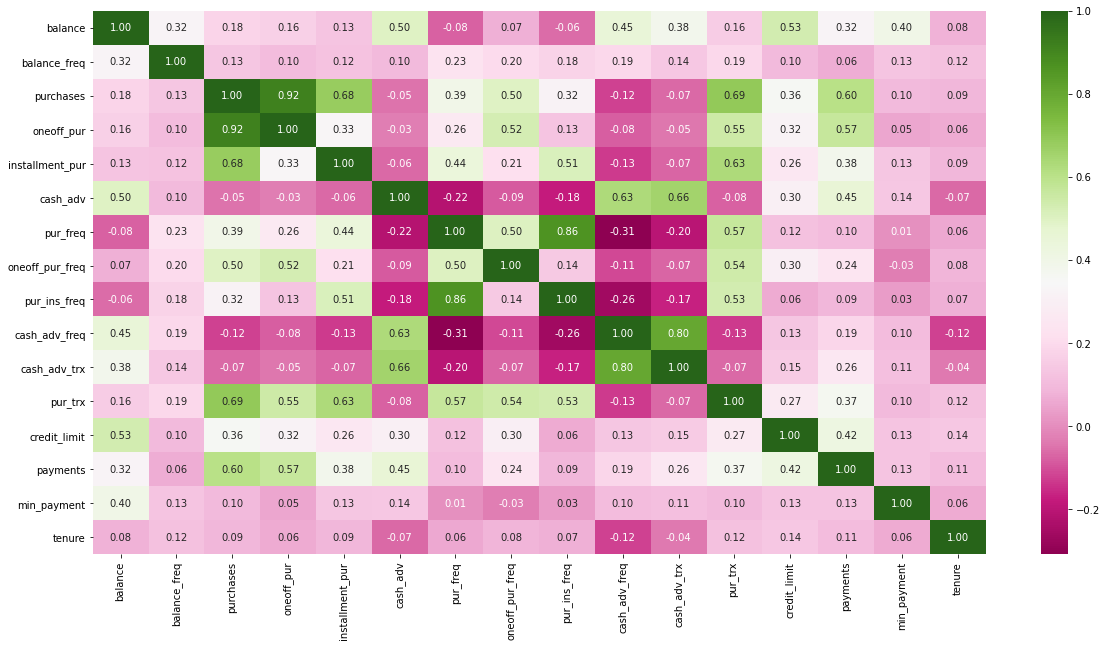

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG", fmt='.2f')
plt.show()

Dari hasil grafik di atas terdapat banyak korelasi antara feature satu dengan yang lainnya. Hal ini ditandai dengan banyaknya sel yang berwarna hijau (nilai korelasi > 0,4). Diduga akan terdapat _multicolinearity_ dalam dataset. 

_Multicolinearity_ terjadi setiap kali variabel independen sangat berkorelasi dengan satu atau lebih variabel independen lainnya dalam persamaan regresi berganda (_multiple regression_). _multicolinearity_ menjadi masalah karena melemahkan signifikansi statistik dari variabel independen. dapat menyebabkan _confidence interval_ yang lebih luas yang menghasilkan probabilitas yang kurang dapat diandalkan dalam hal pengaruh variabel independen dalam model.

# Data Preprocessing

## Data Scaling

### Detecting Multicolinearity

Untuk mendeteksi adanya _multicolinearity_, akan kita lihat dengan VIF (Variance Inflation Factor) dengan ketentuan sebagai berikut:

|VIF|Keterangan|
|--- |--- |
|$\leq$ 1 | Tidak terdapat _multicolinearity_ |
|< 5 | Terdapat sangat sedikit _multicolinearity_ |
| $\geq$ 5 | Terdapat _multicolinearity_ |

In [44]:
df.drop(['limit'], axis=1, inplace=True)

In [45]:
# Menggunakan variance_inflation_factor (VIF) untuk mendeteksi adanya multicolinearity
vif_data = pd.DataFrame()
vif_data['features'] = df.columns


vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,features,VIF
0,balance,3.686703
1,balance_freq,18.097166
2,purchases,58772.643820
3,oneoff_pur,32776.073533
4,installment_pur,10399.545817
5,cash_adv,3.462635
6,pur_freq,26.028020
7,oneoff_pur_freq,5.700763
8,pur_ins_freq,17.296722
9,cash_adv_freq,4.980752


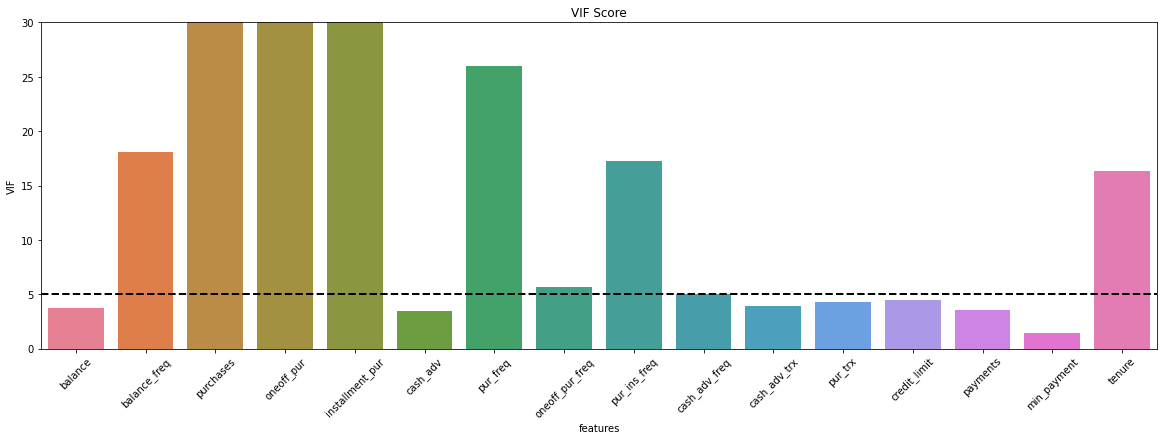

In [46]:
# Grafik VIF Score dengan batas = 5
plt.figure(figsize=(20,6))
sns.barplot(data=vif_data, x='features', y='VIF', palette='husl')
plt.axhline(5, color='black', linestyle='dashed', linewidth=2)
plt.title('VIF Score')
plt.xticks(rotation=45)
plt.ylim(0,30)
plt.show()

- Terdapat 9 feature yang tidak saling berkaitan dengan featurenya
- Dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sebanyak 8-9 dimensi

### Scaling with PCA

Setelah terdeteksi adanya _multicolinearity_, baiknya dilakukan pengurangan dimensi (_dimentional reduction_) pada dataset. Kali ini akan dilakukan pengurangan dimensi dengan metode PCA. Namun sebelumnya akan dilakukan scaling dulu terhadap dataset.

In [47]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)

Diharapkan nilai variance ratio nya 95% agar data yang telah direduksi dimensinya tetap dapat merepresentasikan dataset secara keseluruhan

In [48]:
pca1 = PCA(n_components=0.95)
df_pca = pca1.fit_transform(df_scaled)
df_pca

array([[-1.6889243 , -1.06371013,  0.58886591, ..., -0.00736192,
        -0.19388525, -0.16556301],
       [-1.03371297,  2.71289626,  0.46855131, ..., -0.99331275,
        -0.82374913, -0.5853269 ],
       [ 1.02212501, -0.59292275,  0.28322636, ...,  0.0968469 ,
        -0.75772708,  0.33577871],
       ...,
       [-1.08651635, -1.68527773, -0.62922534, ..., -0.84805916,
         0.16837717,  0.04024098],
       [-2.4359451 , -0.39855771,  0.81681152, ...,  0.05545371,
        -0.35308466,  0.07051542],
       [-0.53148265, -0.4477122 ,  0.96930871, ...,  0.64458825,
        -0.43093413, -0.11948716]])

In [49]:
pca1.explained_variance_ratio_.sum()

0.9580259023389464

In [50]:
pca1.n_components_

11

Dataset dapat direduksi hingga menjadi 11 dimensi

# Model Definition and Training

## K-Means Model

### Find the Best K
Mencari nilai k terbaik untuk pemilihan jumlah cluster dalam training pemodelan

#### Elbow Method

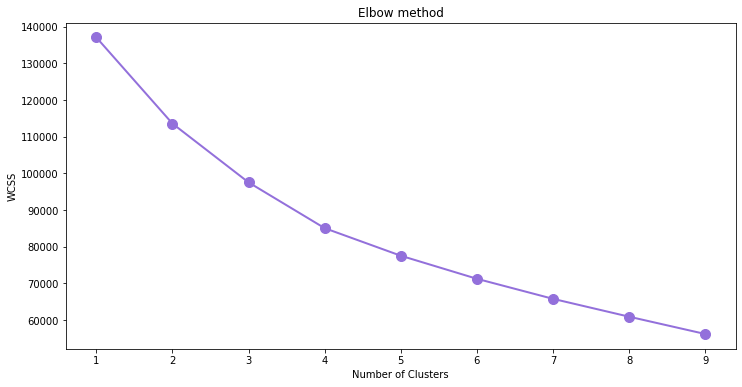

In [51]:
km_model = [KMeans(n_clusters=k, random_state=42).fit(df_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in km_model]

plt.figure(figsize=(12,6))
plt.plot(range(1, 10), innertia, linewidth=2, markersize=10, marker='o', color = 'mediumpurple')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- Terlihat patahan dalam grafik di angka cluster=4 

#### Silhouette Score

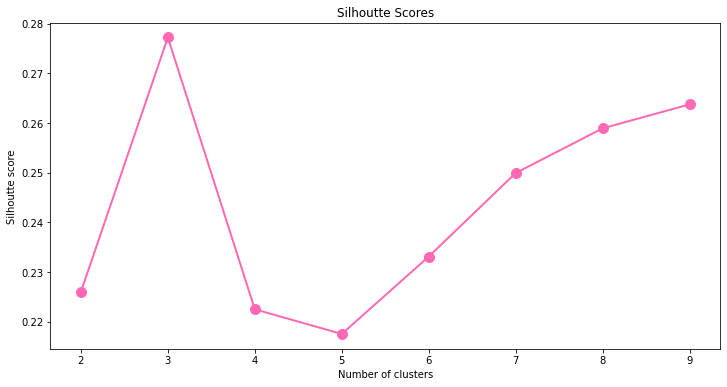

In [52]:
# WARNING! long running time
sil_score = [silhouette_score(df_pca, model.labels_) for model in km_model[1:10]]

plt.figure(figsize=(12,6))
plt.plot(range(2,10), sil_score, linewidth=2, markersize=10, marker='o', color = 'hotpink')
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9])
plt.title('Silhoutte Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Berbeda dengan hasil dari Elbow Method, hasil dari grafik silhouette score justru lebih tinggi di angka k=3 dan k=9

In [53]:
def visualize_silhouette(cluster_lists, X_features): 

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
   
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

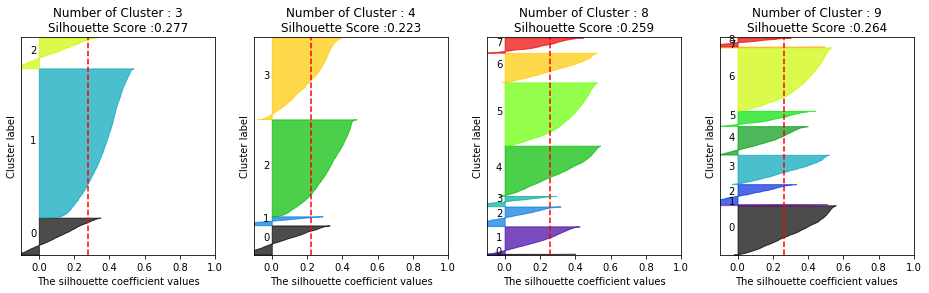

In [54]:
# WARNING! long running time
visualize_silhouette([3, 4, 8, 9], df_pca)

Telah dilakukan perhitungan ulang untuk k=3, k=4, k=8, dan k=9. Angka terbaik yang dihasilkan adalah k=3. Kemudian untuk training model akan dipakai jumlah cluster pemodelan = 3

### Training Model - K Means

In [55]:
model_km = KMeans(n_clusters=3, random_state=42)
y_km = model_km.fit_predict(df_pca)

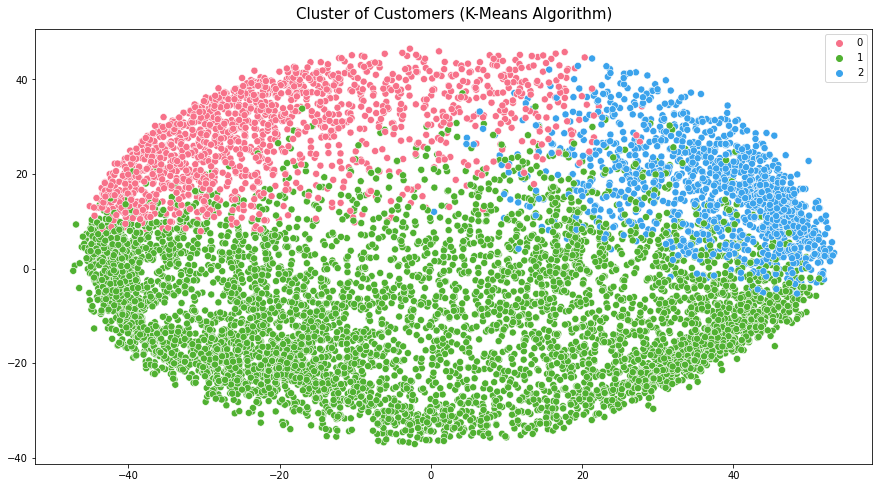

In [56]:
dist = 1-cosine_similarity(df_pca)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y_km, palette=sns.color_palette('husl', model_km.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers (K-Means Algorithm)', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

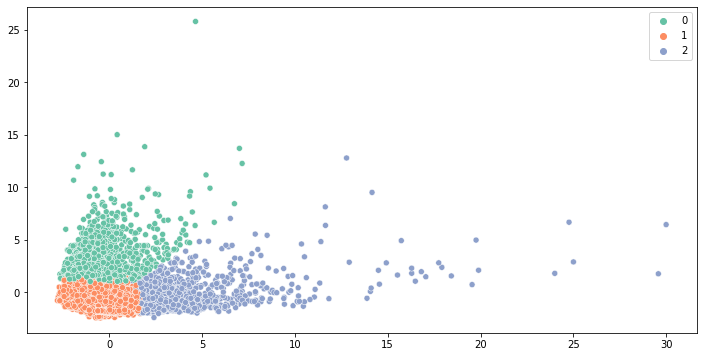

In [57]:
# Cara lain untuk visualisasi 2D

#Create mode PCA 2 Dimensions
pca2d = PCA(n_components=2)
X_train2d = pca2d.fit_transform(df_pca)


#Graph
plt.figure(figsize=(12,6))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y_km, palette="Set2")
plt.show()

## Gaussian Mixture Model

### Find the Best n_component with BIC Score
Berbeda halnya dengan K-Means yang umumnya menggunakan silhouette score untuk penentuan jumlah cluster, Model Gaussian Mixture menggunakan BIC Score.

In [58]:
# WARNING! long running time
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(1, 10)
bics=[]
iterations=2
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2, random_state=42).fit(df_pca) 
        
        tmp_bic.append(gmm.bic(df_pca))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/2)))
    bics.append(val)
    
bic_scores = pd.DataFrame()
bic_scores['Number of Clusters']=[1,2,3,4,5,6,7,8,9]
bic_scores['BIC Scores']=bics
bic_scores

,Number of Clusters,BIC Scores
0,1,280031.809425
1,2,203154.750735
2,3,139038.748198
3,4,81653.296719
4,5,68628.486090
5,6,49371.649968
6,7,26122.344833
7,8,5938.882491
8,9,1828.290031


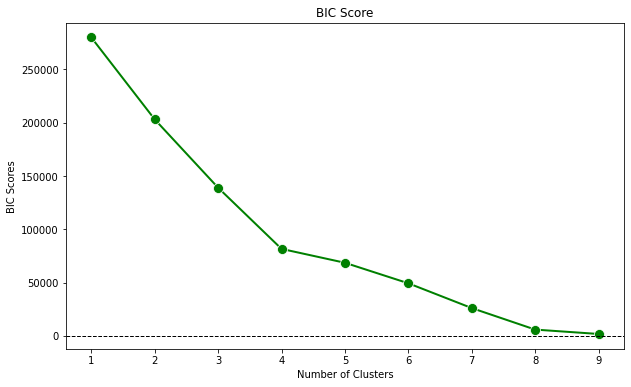

In [59]:
plt.figure(figsize=(10,6))
sns.lineplot(data=bic_scores, x='Number of Clusters', y='BIC Scores', linewidth=2, 
             markersize=10, marker='o', color = 'green')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('BIC Score')
plt.show()

Nilai yang terbaik dari BIC Score untuk pemodelan Gaussian Mixture adalah nilai yang terkecil. Kemudian akan dilakukan training dengan jumlah cluster = 9

### Training Model - Gaussian Mixtures

In [60]:
model_gaus9 = GaussianMixture(n_components=9, n_init=10, random_state=42)
y_gm9 = model_gaus9.fit_predict(df_pca)

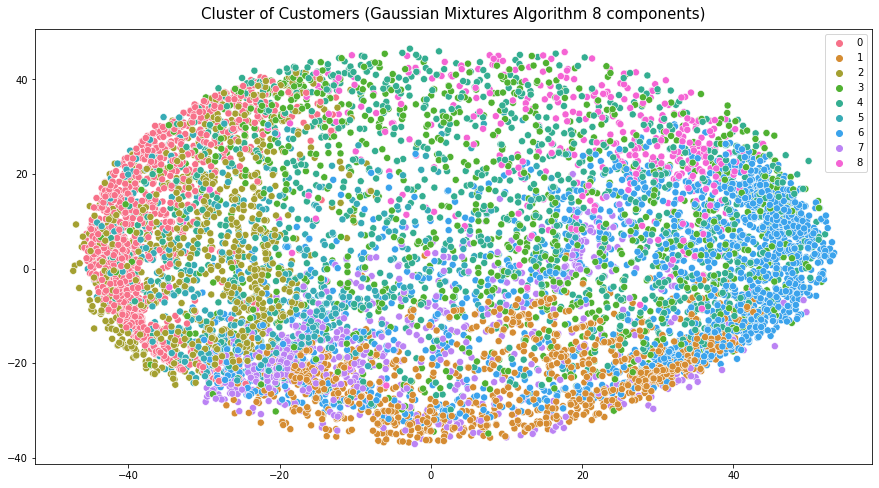

In [61]:
dist = 1-cosine_similarity(df_pca)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y_gm9, palette=sns.color_palette('husl', len(np.unique(y_gm9))), s=50)
plt.title('Cluster of Customers (Gaussian Mixtures Algorithm 8 components)', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

Tampaknya hasil dari perhitungan BIC score dimana nilai terbaiknya adalah n=9 tidak memberikan hasil yang optimal pada model Gaussian Mixture ini. Sekarang akan dicoba training model Gaussian Mixture dengan n-component=3. Kemudian akan kita bandingkan hasilnya dengan hasil training model dari K-Means.

# Model Evaluation based on Visualization

In [62]:
model_gaus3 = GaussianMixture(n_components=3, n_init=10, random_state=42)
y_gm3 = model_gaus3.fit_predict(df_pca)

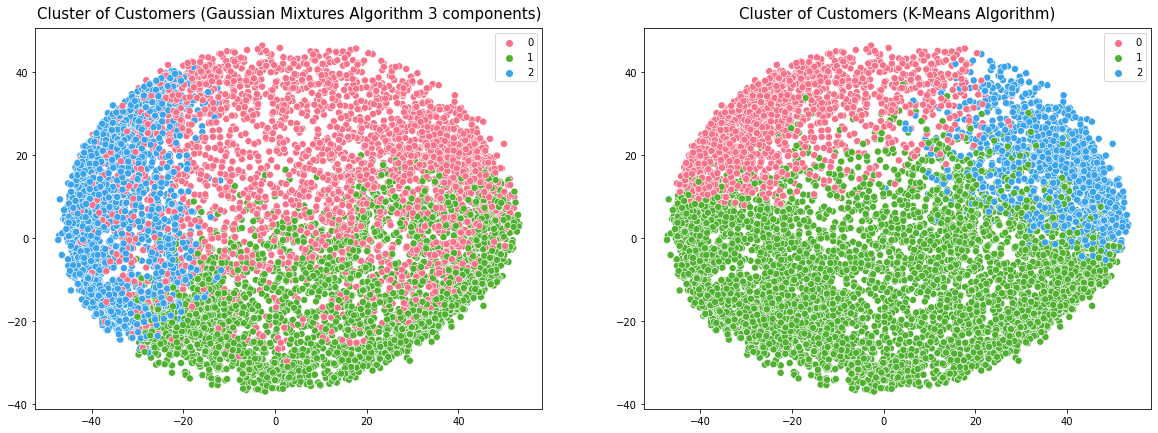

In [63]:
dist = 1-cosine_similarity(df_pca)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y_gm3, palette=sns.color_palette('husl', len(np.unique(y_gm3))), s=50)
plt.title('Cluster of Customers (Gaussian Mixtures Algorithm 3 components)', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])

plt.subplot(1,2,2)
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y_km, palette=sns.color_palette('husl', model_km.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers (K-Means Algorithm)', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])

plt.show()

Dilihat dari visualisasinya, proses clustering dengan K-Means lebih terlihat pemisahan antar cluster nya dibandingkan dengan Gaussian Mixture. Kemudian selanjutnya akan dipilih hasil dari training model K-Means untuk segmentasi user kartu kredit.

In [64]:
df['cluster'] = y_km

In [65]:
df.head()

,balance,balance_freq,purchases,oneoff_pur,installment_pur,cash_adv,pur_freq,oneoff_pur_freq,pur_ins_freq,cash_adv_freq,cash_adv_trx,pur_trx,credit_limit,payments,min_payment,tenure,cluster
id,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,12,0
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,12,1
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,12,1
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,12,1


In [66]:
df['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [67]:
df['cluster'].replace({0 : 'Cluster A',
                       1 : 'Cluster B',
                       2 : 'Cluster C'}, inplace=True)

Sekarang kita sudah memiliki kolom baru pada dataset yaitu 'cluster' yang berisi 3 jenis cluster (A, B dan C). Untuk karakteristik dari tiap cluster ini sendiri perlu kita eksplorasi berdasarkan visualisasi datanya.

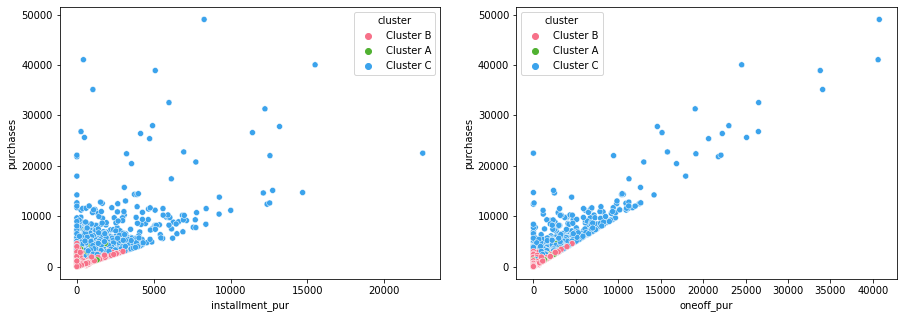

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='installment_pur', y='purchases', hue='cluster', palette='husl')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='oneoff_pur', y='purchases', hue='cluster', palette='husl')
plt.show()

Dilihat dari jumlah nilai transaksi pembelian baik cicilan maupun bukan Cluster A dan B lebih rendah nilainya dibandingkan dengan Cluster C

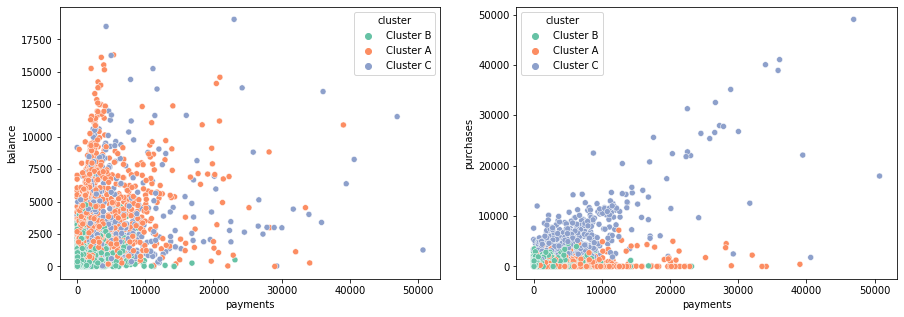

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='payments', y='balance', hue='cluster', palette='Set2')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='payments', y='purchases', hue='cluster', palette='Set2')
plt.show()

- Cluster C melakukan payment dengan nilai yang lebih tinggi dibandingkan dengan Cluster A dan B
- Cluster A dan C memiliki balance yang lebih tinggi dibandingkan dengan Cluster B

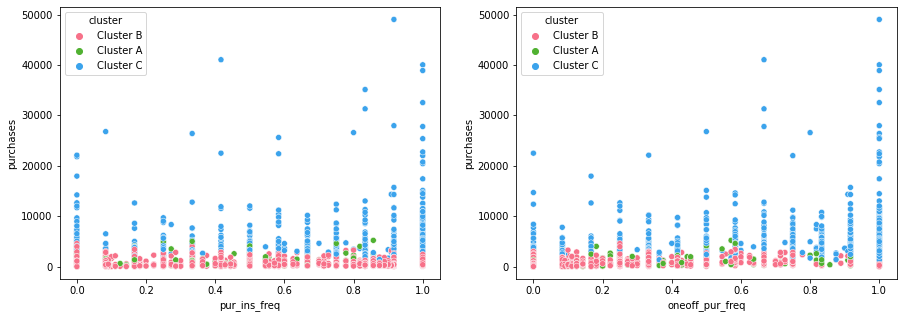

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='pur_ins_freq', y='purchases', hue='cluster', palette='husl')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='oneoff_pur_freq', y='purchases', hue='cluster', palette='husl')
plt.show()

- Ketiga cluster sama-sama memiliki kebiasaan melakukan transaksi cicilan dan juga transaksi sekaligus
- Nominal pembelanjaannya tetap Cluster C di atas cluster lainnya

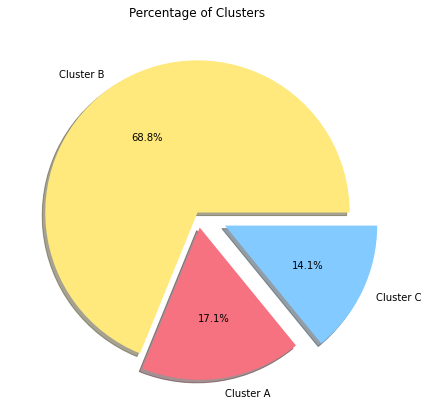

In [71]:
colors = ["#FFE87C", "#F67280", "#82CAFF"]
explode=[0,0.1,0.2]

plt.figure(figsize=(10,7))
plt.title('Percentage of Clusters')
plt.pie(df['cluster'].value_counts(), autopct="%.1f%%", colors=colors, 
        explode=explode, shadow=True, labels=df['cluster'].unique())
plt.show()

Jumlah user cluster B paling banyak dibandingkan dengan user cluster lainnya

Ingin kita lihat dari analisis sebelumnya, apakah cluster B merupakan cluster yang limit kartu kreditnya < 5,000 USD

In [72]:
labels = ['<5,000 $','5,000-10,000 $','10,000-15,000 $','>15,000 $']
bins = [49.0, 5000.0, 10000.0, 15000.0, 40000.0]
df['limit'] = pd.cut(df["credit_limit"], bins=bins, labels=labels)

In [73]:
dfl = df[['limit', 'cluster']]
z = dfl[dfl['cluster']=='Cluster B']

In [74]:
z['limit'].unique()

['<5,000 $', '5,000-10,000 $', '10,000-15,000 $', '>15,000 $']
Categories (4, object): ['<5,000 $' < '5,000-10,000 $' < '10,000-15,000 $' < '>15,000 $']

Ternyata di dalam Cluster B terdapat user dengan limit kartu kredit beragam, bukan hanya < 5,000 USD

In [75]:
pur = df.groupby('cluster')[['purchases']].mean()
pay = df.groupby('cluster')[['payments']].mean()
bal = df.groupby('cluster')[['balance']].mean()
bayar = pd.concat([pur, pay, bal], axis=1)
bayar

,purchases,payments,balance
cluster,,,
Cluster A,383.750492,3102.494287,4007.537861
Cluster B,499.920260,911.812982,811.250919
Cluster C,4215.131895,4089.848881,2267.815383


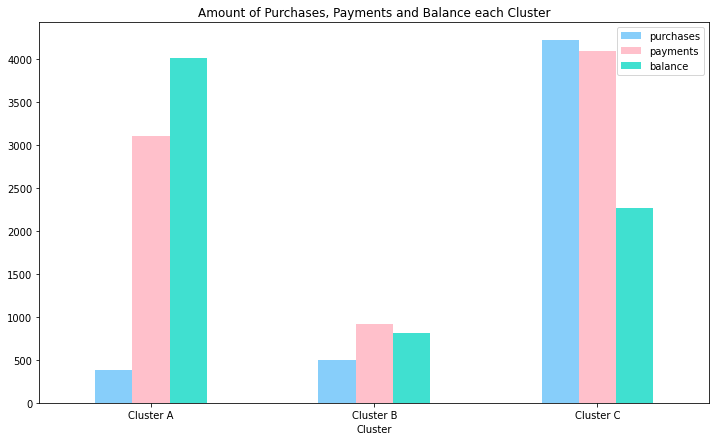

In [76]:
ax = bayar.plot.bar(color={"purchases": "lightskyblue",
                           "payments": "pink", 
                           "balance":"turquoise"},
                    linewidth=2,
                    figsize=(12,7),
                    rot=0)
ax.set_xlabel('Cluster')
ax.set_title('Amount of Purchases, Payments and Balance each Cluster')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=10)
plt.show()


|Activity|Cluster A|Cluster B|Cluster C|
|--- |--- |--- |--- |
|Purchase| + | + | +++ |
|Payment| ++ | + | +++ |
|Balance| +++ | + | ++ |


In [77]:
cash = df.groupby('cluster')[['cash_adv']].mean()
onpur = df.groupby('cluster')[['oneoff_pur']].mean()
inpur = df.groupby('cluster')[['installment_pur']].mean()
shop = pd.concat([cash, onpur, inpur], axis=1)
shop

,cash_adv,oneoff_pur,installment_pur
cluster,,,
Cluster A,3964.270206,248.913685,134.917902
Cluster B,340.768473,249.934015,250.305167
Cluster C,466.382152,2682.953212,1532.654496


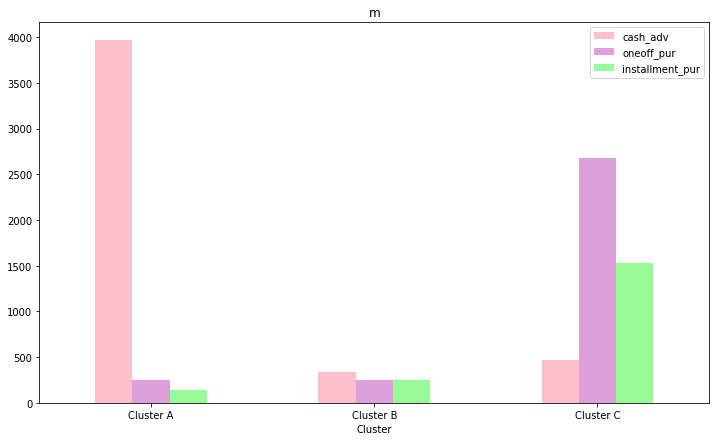

In [78]:
ax = shop.plot.bar(color={ "cash_adv": "pink",
                           "oneoff_pur": "plum",
                           "installment_pur":"palegreen"},
                    linewidth=2,
                    figsize=(12,7),
                    rot=0)
ax.set_xlabel('Cluster')
ax.set_title('m')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=10)
plt.show()

|Activity|Cluster A|Cluster B|Cluster C|
|--- |--- |--- |--- |
|Cash advance| +++ | + | + |
|Oneoff purchase| + | + | +++ |
|Installment purchase| + | + | +++ |

# Model Inference
Terdapat sebuah kumpulan data dummy sebanyak 5 data yang berisi nilai random di bawah ini. Kemudian kelima data tersebut akan diprediksi golongan cluster-nya

In [79]:
# Membuat dataset dummy
dummy = pd.DataFrame()
dummy['A'] = np.random.uniform(0, 10000, 5)
dummy['B'] = np.random.uniform(0.0, 1.0, 5)
dummy['C'] = np.random.uniform(0.0, 1.0, 5)
dummy['D'] = np.random.uniform(0, 40000, 5)
dummy['E'] = np.random.uniform(0, 40000, 5)
dummy['F'] = np.random.uniform(0, 20000, 5)
dummy['G'] = np.random.uniform(0.0, 1.0, 5)
dummy['H'] = np.random.uniform(0.0, 1.0, 5)
dummy['I'] = np.random.uniform(0.0, 1.0, 5)
dummy['J'] = np.random.uniform(0.0, 1.0, 5)
dummy['K'] = np.random.randint(0, 150, 5)
dummy['L'] = np.random.randint(0, 400, 5)
dummy['M'] = np.random.uniform(50, 30000, 5)
dummy['N'] = np.random.uniform(0, 50000, 5)
dummy['O'] = np.random.uniform(0, 70000, 5)
dummy['P'] = np.random.randint(1, 12, 5)
dummy

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,4614.101992,0.166717,0.777840,21276.391049,29894.211134,15367.683938,0.173348,0.593312,0.662547,0.872119,22,2,15735.886841,49878.974527,22973.526796,3
1,9840.376903,0.062954,0.906289,28744.922734,8200.766195,4639.318861,0.527749,0.481406,0.148472,0.331668,40,393,23478.927830,49200.610014,62938.105611,5
2,1537.633865,0.119617,0.681350,9446.230207,10114.963550,19363.834646,0.258458,0.838076,0.103319,0.575942,46,53,16232.840001,34079.271128,49674.475017,3
3,8412.513848,0.252984,0.022434,14399.507423,17094.167744,1563.628482,0.742515,0.091374,0.987851,0.694714,41,54,17887.505973,40786.484754,21886.317282,8
4,2461.365799,0.348177,0.854639,1152.737822,13345.907479,1817.810432,0.673503,0.648975,0.055769,0.469971,127,369,21889.988385,36484.446672,19921.604099,3


In [80]:
# Data dummy di tes oleh model K-Means yang telah di-train sebelumnya
y_dum = model_km.fit_predict(dummy)

In [81]:
# Mendefinisikan hasil pemodelan ke dalam dataset dummy
dummy['predicted_cluster'] = y_dum

In [82]:
# Mengganti label cluster
dummy['predicted_cluster'].replace({0 : 'Cluster A',
                                    1 : 'Cluster B',
                                    2 : 'Cluster C'}, inplace=True)

# Menampilkan hasil prediksi cluster data dummy
dummy['predicted_cluster']

0    Cluster A
1    Cluster B
2    Cluster C
3    Cluster A
4    Cluster A
Name: predicted_cluster, dtype: object

# Conclusion

1. Terapat beberapa anomali , outlier, dan mulicolinearity pada dataset, kemudian dilakukan dimensional reduction dengan metode PCA menjadi 11 dimensi dari 17 dimensi
2. Dilakukan training pemodelan dengan 2 model, yaitu K-Means dan Gaussian Mixture
3. Nilai silhouette score cukup rendah (di bawah 0,3) dibanding 1,0 akan tetapi hasil pemodelan dari K-Means lebih baik dibanding Gaussian Mixture jika dilihat dari visualisasi hasil datanya.
4. Setelah dilakukan training pemodelan dengan berbagai nilai jumlah cluster, didapat hasil yang optimal yaitu jumlah cluster = 3 (Cluster A, B, C)
5. Ketiga cluster memiliki karakteristik sebagai berikut :
|Activity|Cluster A|Cluster B|Cluster C|
|--- |--- |--- |--- |
|Purchase| + | + | +++ |
|Payment| ++ | + | +++ |
|Balance| +++ | + | ++ |
|Cash advance| +++ | + | + |
|Oneoff purchase| + | + | +++ |
|Installment purchase| + | + | +++ |

- Cluster A : user semi aktif, sangat tertarik dengan fitur cash advance, selalu menjaga balance / saldo kartu kreditnya terisi
- Cluster B : user pasif, paling jarang melakukan transaksi apapun (nominalnya juga rendah) dibandingkan dengan Cluster lainnya
- Cluster C : user aktif, paling sering melakukan transaksi (kecuali penarikan tunai / cash advance). Cenderung bertransaksi dengan nominal yang cukup tinggi dibanding dengan cluster lainnya